### Aula 2: Exercícios

Para estes exercícios, iremos utilizar duas bases:

1) base fictícia de funcionários criada por cientistas de dados da IBM.

**Variáveis:**
- **Age:** Idade
- **Attrition:** Se saiu da empresa (Sim ou não)
- **BusinessTravel:** Frequência de viagens a trabalho
- **DailyRate:** Custo do funcionário por dia
- **Department:** Departamento
- **DistanceFromHome:** Distância do trabalho até a casa do funcionário
- **Education:** Nível de educação:
    - 1: 'Below College'
    - 2: 'College'
    - 3: 'Bachelor'
    - 4: 'Master'
    - 5: 'Doctor'
- **EducationField:** Área da educação
- **EmployeeNumber:** ID do funcionário
- **EnvironmentSatisfaction:** Satisfação com o ambiente de trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **Gender:** Gênero
- **HourlyRate:** Valor/hora
- **JobInvolvement:** Nível de envolvimento com o trabalho (psicologica e emocionalmente):
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **JobLevel:** Nível do funcionário
- **JobRole:** Cargo
- **JobSatisfaction:** Nível de satisfação com o trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **MaritalStatus:** Estado Civil
- **NumCompaniesWorked:** Número de empresas que já trabalhou
- **PercentSalaryHike:** Aumento salarial (%)
- **PerformanceRating:** Nível de performance:
    - 1: 'Low'
    - 2: 'Good'
    - 3: 'Excellent'
    - 4: 'Outstanding'
- **RelationshipSatisfaction:** Satisfação de relacionamento:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **TotalWorkingYears:** Número de anos trabalhados
- **TrainingTimesLastYear:** Número de treinamentos no ano anterior
- **WorkLifeBalance:** Equilíbrio da vida profissional
    - 1: 'Bad'
    - 2: 'Good'
    - 3: 'Better'
    - 4: 'Best'
- **YearsAtCompany:** Anos na empresa
- **YearsInCurrentRole:** Anos na posição atual
- **YearsSinceLastPromotion:** Anos desde a última promoção
- **YearsWithCurrManager:** Anos com o mesmo gestor

2) Base de dados de casos e óbitos de covid no estado de SP.

- **nome_munic:** Nome do município
- **codigo_ibge:** Código do município no IBGE (7 dígitos)
- **casos_novos:** Casos novos registrados na data
- **obitos_novos:** Óbitos novos registrados na data
- **nome_drs:** Nome do Dpto. Regional de Saúde
- **cod_drs:** Código do Dpto. Regional de Saúde
- **pop:** População Estimada (fonte: SEADE)
- **pop60:** População acima de 60 anos (fonte: SEADE)
- **ano_mes:** Ano e mês dos dados

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df1 = pd.read_csv('./data/IBM_Employees.csv')

In [9]:
df2 = pd.read_csv('./data/dados_covid_sp_20.csv')

## Exercício 1:
Utilizando a base de dados de covid:

**a)** Faça um gráfico de barras mostrando o total de óbitos (considerando todos os meses) para todos os DRS, excluindo a Grande São Paulo. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom e intercale as barras com as cores 'red' e 'green'.

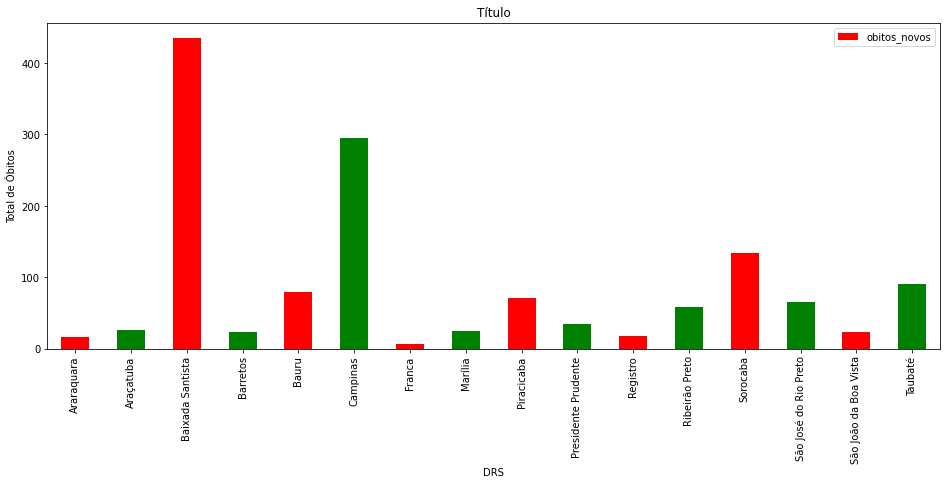

In [11]:
filtro_a = (df2['nome_drs'] != 'Grande São Paulo')

df2[filtro_a].groupby('nome_drs').sum().plot(y='obitos_novos', kind='bar',
                                           figsize=(16,6), xlabel='DRS',
                                           ylabel='Total de Óbitos', title='Título',
                                           color=('red', 'green'))

plt.show()

**b)**  Faça um gráfico de barras horizontal mostrando o total de óbitos no mês de abril para 3 DRS da sua escolha. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom.

In [12]:
df2[df2['ano_mes'] == '2020-04']

,nome_munic,codigo_ibge,nome_drs,cod_drs,pop,pop_60,ano_mes,casos_novos,obitos_novos
2,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-04,5,0
7,Adolfo,3500204,São José do Rio Preto,15.0,3447.0,761.0,2020-04,1,0
12,Aguaí,3500303,São João da Boa Vista,14.0,35608.0,5245.0,2020-04,14,2
17,Agudos,3500709,Bauru,12.0,36134.0,5524.0,2020-04,15,1
22,Alambari,3500758,Sorocaba,6.0,5779.0,830.0,2020-04,1,0
...,...,...,...,...,...,...,...,...,...
3202,Águas de São Pedro,3500600,Piracicaba,11.0,3122.0,764.0,2020-04,1,0
3207,Álvares Florence,3501202,São José do Rio Preto,15.0,3621.0,991.0,2020-04,0,0
3212,Álvares Machado,3501301,Presidente Prudente,2.0,23789.0,4267.0,2020-04,1,0
3217,Álvaro de Carvalho,3501400,Marília,5.0,5044.0,583.0,2020-04,0,0


In [13]:
filtro_b1 = (df2['nome_drs'].isin(('Araraquara', 'Araçatuba', 'Bauru')))
filtro_b2 = (df2['ano_mes'] == '2020-04')

df2[filtro_b1 & filtro_b2]

,nome_munic,codigo_ibge,nome_drs,cod_drs,pop,pop_60,ano_mes,casos_novos,obitos_novos
17,Agudos,3500709,Bauru,12.0,36134.0,5524.0,2020-04,15,1
42,Alto Alegre,3501103,Araçatuba,7.0,4017.0,964.0,2020-04,0,0
67,Américo Brasiliense,3501707,Araraquara,8.0,40243.0,4465.0,2020-04,7,0
82,Andradina,3502101,Araçatuba,7.0,56054.0,10776.0,2020-04,11,0
92,Anhembi,3502309,Bauru,12.0,6672.0,975.0,2020-04,2,0
...,...,...,...,...,...,...,...,...,...
3032,Trabiju,3554755,Araraquara,8.0,1703.0,281.0,2020-04,0,0
3062,Turiúba,3555208,Araçatuba,7.0,1912.0,477.0,2020-04,0,0
3097,Uru,3555901,Bauru,12.0,1207.0,258.0,2020-04,0,0
3122,Valparaíso,3556305,Araçatuba,7.0,23988.0,3207.0,2020-04,0,0


<AxesSubplot:title={'center':'Título Gráfico'}, xlabel='Título de X', ylabel='Título de Y'>

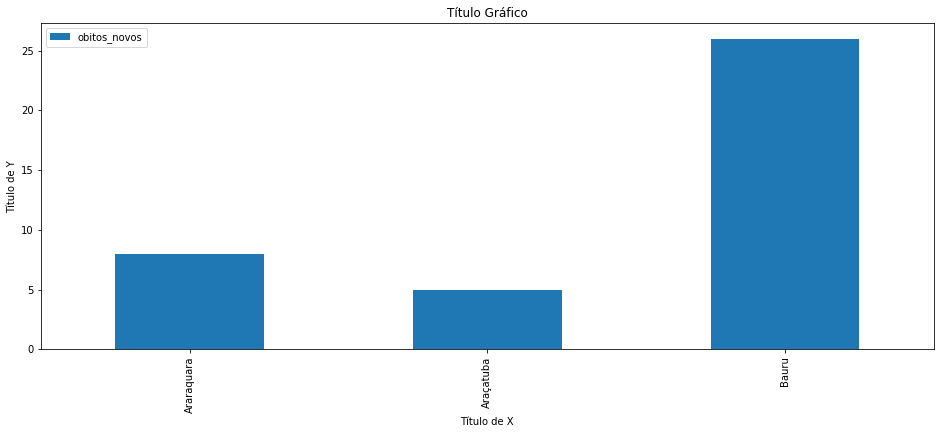

In [14]:
filtro_b1 = (df2['nome_drs'].isin(('Araraquara', 'Araçatuba', 'Bauru')))
filtro_b2 = (df2['ano_mes'] == '2020-04')

df2[filtro_b1 & filtro_b2].groupby('nome_drs').sum().plot(y='obitos_novos', kind='bar',
                                           figsize=(16,6), xlabel='Título de X',
                                           ylabel='Título de Y', title='Título Gráfico')

## Exercício 2

**a)** Utilizando a base de dados da IBM, crie um histograma para as idades dos funcionários, separando por gênero.

In [23]:
df1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

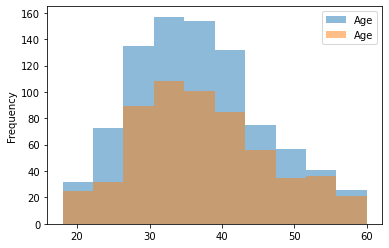

In [35]:
ax1 = df1[df1['Gender'] == 'Male'].plot(y='Age', kind='hist', alpha=.5)

ax2 = df1[df1['Gender'] == 'Female'].plot(y='Age', kind='hist', alpha=.5, ax=ax1)

plt.show()

**b)** Faça agora um boxplot das idades, por gênero.

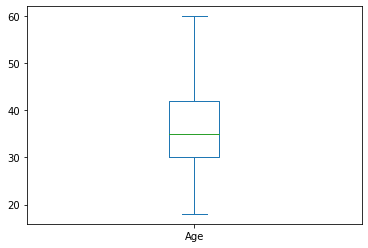

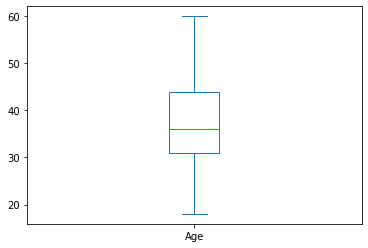

In [41]:
ax1 = df1[df1['Gender'] == 'Male'].plot(y='Age', kind='box')

ax2 = df1[df1['Gender'] == 'Female'].plot(y='Age', kind='box')

plt.show()